Q2 : répartition socio-professionnelle des militant.e.s cette requête permet de s'intéresser aux environnements socio-professionnelle des militant.e.s. pour voir d'une part les professions des militantes selon les types définis. et ensuite voir les types suivant les genres 

2.1 en premier lieu, il s'agit de voir la répartition socio-professionnelle de manière globale

In [17]:
import sqlite3
import pandas

connection = sqlite3.connect('C:/Users/LZender/Documents/Travail/unine/histoire/mémoire/AEN/grand_conseil/memoire_POP/liste_grand_conseil.db')


cursor = connection.cursor()

df = pandas.read_sql("""
SELECT COUNT (pk_type_M) as count_type_metier, tm.definition  FROM personne as p
LEFT JOIN travaille as t ON t.fk_personne = p.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M

where tm.pk_type_M is not null
group by pk_type_M
order by count_type_metier DESC
""", connection)

total= df['count_type_metier'].sum()

df['pourcentage']= df['count_type_metier']/ total * 100.00

df.head(1000)

,count_type_metier,definition,pourcentage
0,251,usine_batiment,42.687075
1,77,education,13.095238
2,69,domestique,11.734694
3,57,service_publique,9.693878
4,47,artisanat_vente,7.993197
5,18,santé_social,3.061224
6,13,impression_journalisme,2.210884
7,12,employe_bureau,2.040816
8,10,AVS-AI,1.700680
9,10,restauration_hotellerie,1.700680


2.2.1 Répartition socio-professionnel des militantEs

In [18]:
import sqlite3
import pandas

connection = sqlite3.connect('C:/Users/LZender/Documents/Travail/unine/histoire/mémoire/AEN/grand_conseil/memoire_POP/liste_grand_conseil.db')


cursor = connection.cursor()

df = pandas.read_sql("""
SELECT COUNT (pk_type_M) as count_type_metier, tm.definition  FROM personne as p
LEFT JOIN travaille as t ON t.fk_personne = p.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M

where tm.pk_type_M is not null and genre ='F'
group by genre, pk_type_M
order by count_type_metier DESC
""", connection)

total= df['count_type_metier'].sum()

df['pourcentage']= df['count_type_metier']/ total * 100.00

df.head(1000)

,count_type_metier,definition,pourcentage
0,62,domestique,29.951691
1,43,usine_batiment,20.772947
2,30,education,14.492754
3,27,service_publique,13.043478
4,12,artisanat_vente,5.797101
5,10,employe_bureau,4.830918
6,9,santé_social,4.347826
7,4,restauration_hotellerie,1.932367
8,4,AVS-AI,1.932367
9,2,etude_formation,0.966184


2.2.2 répartition socio-professionnelle des militants

In [19]:
import sqlite3
import pandas

connection = sqlite3.connect('C:/Users/LZender/Documents/Travail/unine/histoire/mémoire/AEN/grand_conseil/memoire_POP/liste_grand_conseil.db')


cursor = connection.cursor()

df = pandas.read_sql("""
SELECT COUNT (pk_type_M) as count_type_metier, tm.definition  FROM personne as p
LEFT JOIN travaille as t ON t.fk_personne = p.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M

where tm.pk_type_M is not null and genre ='M'
group by genre, pk_type_M
order by count_type_metier DESC
""", connection)

total= df['count_type_metier'].sum()

df['pourcentage']= df['count_type_metier']/ total * 100.00

df.head(1000)

,count_type_metier,definition,pourcentage
0,208,usine_batiment,54.593176
1,47,education,12.335958
2,35,artisanat_vente,9.186352
3,30,service_publique,7.874016
4,12,impression_journalisme,3.149606
5,9,santé_social,2.362205
6,7,domestique,1.837270
7,6,restauration_hotellerie,1.574803
8,6,AVS-AI,1.574803
9,5,agriculture,1.312336


2.2.3 répartition socio-professionnelle selon le sexe

In [33]:
df = pd.read_sql("""
SELECT 
    pe.genre, 
    tm.definition AS type_metier,
    COUNT(pk_type_M) as count_type_metier
FROM personne AS pe
LEFT JOIN travaille AS t ON t.fk_personne = pe.pk_personne
LEFT JOIN metier AS m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M AS tm ON tm.pk_type_M = m.fk_type_M
WHERE tm.pk_type_M IS NOT NULL  
GROUP BY pe.genre, tm.definition
ORDER BY tm.definition
""", connection)

# Total général sur l'ensemble des lignes
total_general = df['count_type_metier'].sum()

# Pourcentage sur l'ensemble des métiers recensés
df['pourcentage'] = df['count_type_metier'] / total_general * 100.0

# Optionnel : réinitialiser l'index pour une table bien propre
df = df.reset_index(drop=True)

# Affichage du résultat
print(df[['genre', 'type_metier', 'count_type_metier', 'pourcentage']])


   genre              type_metier  count_type_metier  pourcentage
0      F                   AVS-AI                  4     0.680272
1      M                   AVS-AI                  6     1.020408
2      M              agriculture                  5     0.850340
3      F          artisanat_vente                 12     2.040816
4      M          artisanat_vente                 35     5.952381
5      F               artistique                  2     0.340136
6      M               artistique                  5     0.850340
7      M                   autres                  5     0.850340
8      F               domestique                 62    10.544218
9      M               domestique                  7     1.190476
10     F            droit_finance                  1     0.170068
11     M            droit_finance                  3     0.510204
12     F                education                 30     5.102041
13     M                education                 47     7.993197
14     F  

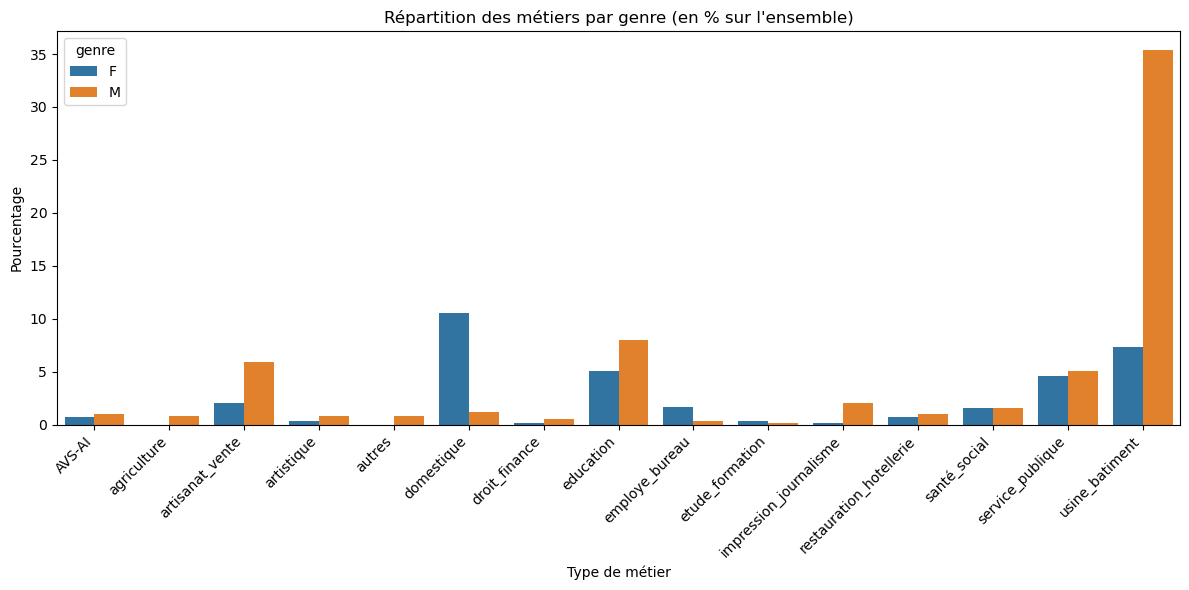

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='type_metier', y='pourcentage', hue='genre')
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des métiers par genre (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("Type de métier")
plt.tight_layout()
plt.show()
